# **Redes Sociales y Salud Mental**

Este Notebook trata de ver y analizar la relación entre el uso de las redes sociales y la salud mental de los usuarios.

In [2]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
drive.mount('/content/drive')
ruta = '/content/drive/MyDrive/Colab Notebooks/smmh.csv'
df = pd.read_csv(ruta)


Mounted at /content/drive


## Análisis Descriptivo

Una vez cargados los datos, el primer paso es visualizar todas las variables y las 10 primeras líneas para hacernos una idea de qué tipo de datos vamos a tratar.

In [15]:
pd.set_option("display.max.columns", None)
df.head()


,timestamp,age,gender,status,occupation,affiliations,social_media,platforms,average_time,no_purpose,media_distraction,restless,distracted,worries,diff_concentrate,compare_success,feeling_comp,seek_validation,depression,interest_fluctuate,sleep_issues
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


In [53]:
len(df)

481

También es importante saber que nuestro conjunto de datos contiene 481 observaciones y 21 columnas.

Las preguntas que corresponden a cada columna son las siguientes:

In [8]:
preguntas_variables = list(df.columns)
preguntas_variables.pop(0)
print("PREGUNTAS:")
for variable in preguntas_variables:
  print(variable)

PREGUNTAS:
1. What is your age?
2. Gender
3. Relationship Status
4. Occupation Status
5. What type of organizations are you affiliated with?
6. Do you use social media?
7. What social media platforms do you commonly use?
8. What is the average time you spend on social media every day?
9. How often do you find yourself using Social media without a specific purpose?
10. How often do you get distracted by Social media when you are busy doing something?
11. Do you feel restless if you haven't used Social media in a while?
12. On a scale of 1 to 5, how easily distracted are you?
13. On a scale of 1 to 5, how much are you bothered by worries?
14. Do you find it difficult to concentrate on things?
15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?
16. Following the previous question, how do you feel about these comparisons, generally speaking?
17. How often do you look to seek validation from features of social media?
18. How o

No obstante, para simplificar el análisis, vamos a renombrar las variables y a sacar algunas estadísticas para tener una imagen inicial del contenido de las variables.

In [11]:
nuevos_nombres = ['timestamp', 'age', 'gender', 'status', 'occupation', 'affiliations', 'social_media', 'platforms', 'average_time', 'no_purpose', 'media_distraction', 'restless', 'distracted', 'worries', 'diff_concentrate', 'compare_success', 'feeling_comp','seek_validation', 'depression', 'interest_fluctuate', 'sleep_issues']
df.columns = nuevos_nombres
print(df.columns)

Index(['timestamp', 'age', 'gender', 'status', 'occupation', 'affiliations',
       'social_media', 'platforms', 'average_time', 'no_purpose',
       'media_distraction', 'restless', 'distracted', 'worries',
       'diff_concentrate', 'compare_success', 'feeling_comp',
       'seek_validation', 'depression', 'interest_fluctuate', 'sleep_issues'],
      dtype='object')


In [13]:
df.describe()

,age,no_purpose,media_distraction,restless,distracted,worries,diff_concentrate,compare_success,feeling_comp,seek_validation,depression,interest_fluctuate,sleep_issues
count,481.00000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.13659,3.553015,3.320166,2.588358,3.349272,3.559252,3.245322,2.831601,2.775468,2.455301,3.255717,3.170478,3.201663
std,9.91511,1.096299,1.328137,1.257059,1.175552,1.283356,1.347105,1.407835,1.056479,1.247739,1.313033,1.256666,1.461619
min,13.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.00000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,22.00000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,26.00000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000
max,91.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


En la tabla anterior podemos ver que, a pesar de que la media de edad son 26 años, el 50% de las personas que respondieron la encuesta están entre los 21 y los 26 años.

Las otras variables son categóricas y, por tanto, los datos de los percentiles son irrelevantes. No obstante, vemos que sus medias individuales varian entre 2.45 y 3.56, aproximadamente.

En general, el grado de búsqueda de validación en redes sociales de los encuestados no es demasiado alto mientras que el grado de preocupaciones que sufren es la pregunta que recibió puntuaciones más altas.

## Visualización

A partir de ahora nos centraremos en la visualización de los datos para conocer algunas variables más a fondo.

El siguiente gráfico circular muestra los diferentes estados de ocupación de los encuestados, donde la mayoría son estudiantes universitarios y los jubilados son una proporción muy pequeña de las observaciones.

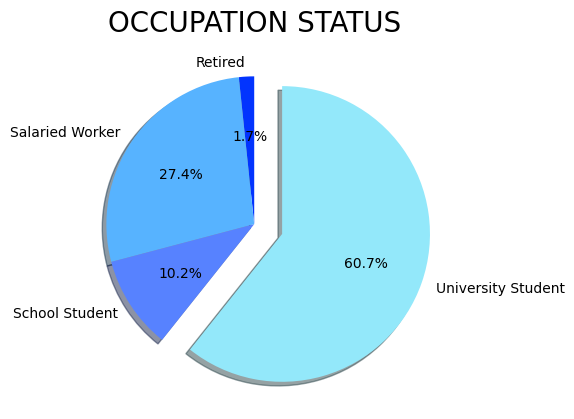

In [12]:
counts = df['occupation'].value_counts()
counts = counts.sort_index()
myexplode = [0, 0, 0, 0.2]
mycolors= ["#0234FE", "#57B3FF", "#5782FF", "#93E8FA"]
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, explode = myexplode, shadow = True, colors = mycolors)
plt.title('OCCUPATION STATUS', loc='center', fontsize=20)

plt.show()

A continuación, seleccionamos las variables edad y el tiempo medio de uso de redes sociales y creamos un histograma por cada rango de tiempo de uso.

Las líneas discontinuas de color azul claro respresentan la edad media.

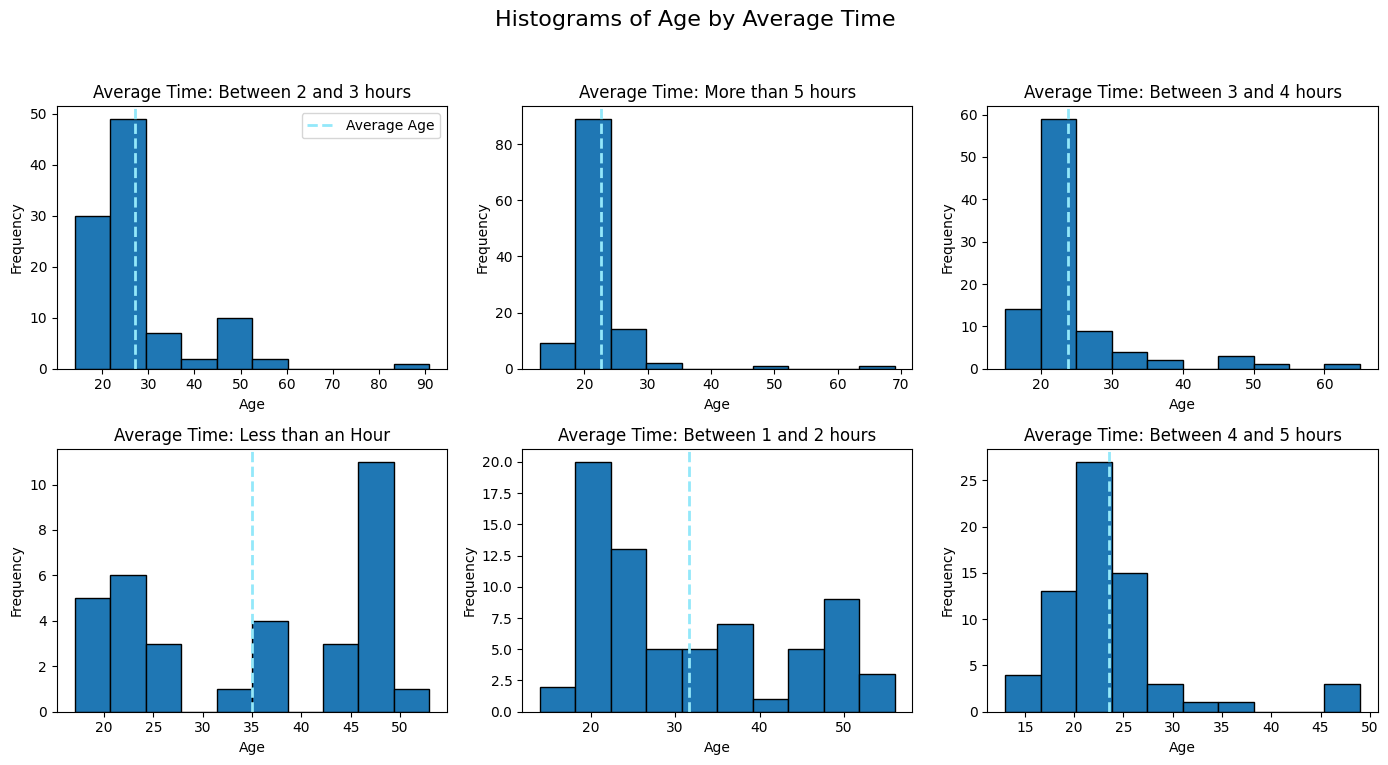

In [9]:
subdatasets = {}
for time_value in df['average_time'].unique():
    subdatasets[time_value] = df[df['average_time'] == time_value]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
fig.suptitle('Histograms of Age by Average Time', fontsize=16)

for i, (time_value, subset) in enumerate(subdatasets.items()):
    ax = axes[i // 3, i % 3]
    ax.hist(subset['age'], bins=10, edgecolor='black')
    ax.axvline(subset['age'].mean(), color='#93E8FA', linestyle='dashed', linewidth=2, label='Average Age')
    ax.set_title(f'Average Time: {time_value}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')

axes[0, 0].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Es interesante ver cómo en los grupos con más uso de las redes sociales (de 2 a 5 horas) la media de edad está entre los 20 y los 25 mientras que de 0 a 2 horas la media se sitúa por encima de los 30 años.

También se puede ver claramente por la frecuencia en cada histograma que las observaciones de encuestados entre 40 y 90 años es significativamente menor que las observaciones de entre 20 y 30 años.

Ahora seleccionamos la variable donde se indica qué plataformas usan los encuestados y procedemos a separar cada respuesta y hacer un gráfico de barras donde se puede ver que las plataformas más usadas son: Youtube, Facebook e Instagram.

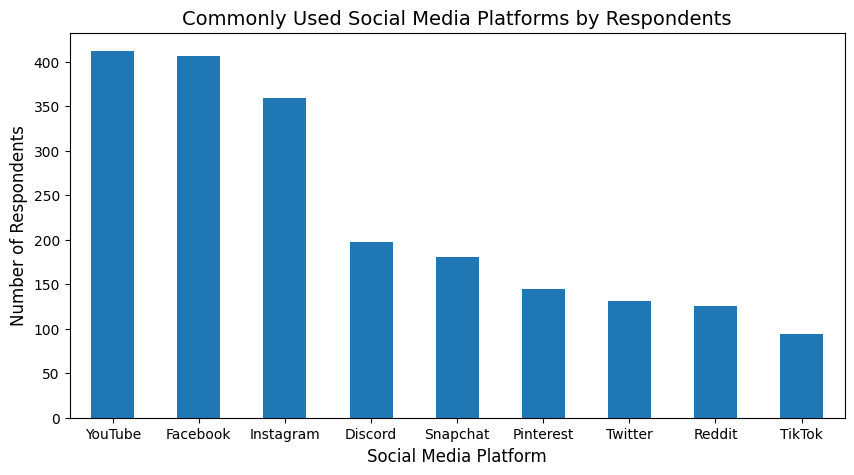

In [17]:
used_platforms = df['platforms'].str.split(', ', expand=True).stack().value_counts()

plt.figure(figsize=(10, 5))
bars = used_platforms.plot(kind='bar')
plt.title('Commonly Used Social Media Platforms by Respondents', fontsize ='14')
plt.xlabel('Social Media Platform', fontsize = 12)
plt.ylabel('Number of Respondents', fontsize = 12)
plt.xticks(rotation = 0)
plt.show()


Para el siguiente gráfico las variables seleccionadas son:
- la frecuencia con que los encuestados se sienten deprimidos o bajos de moral.
- la frecuencia con la que experimentan problemas de sueño.



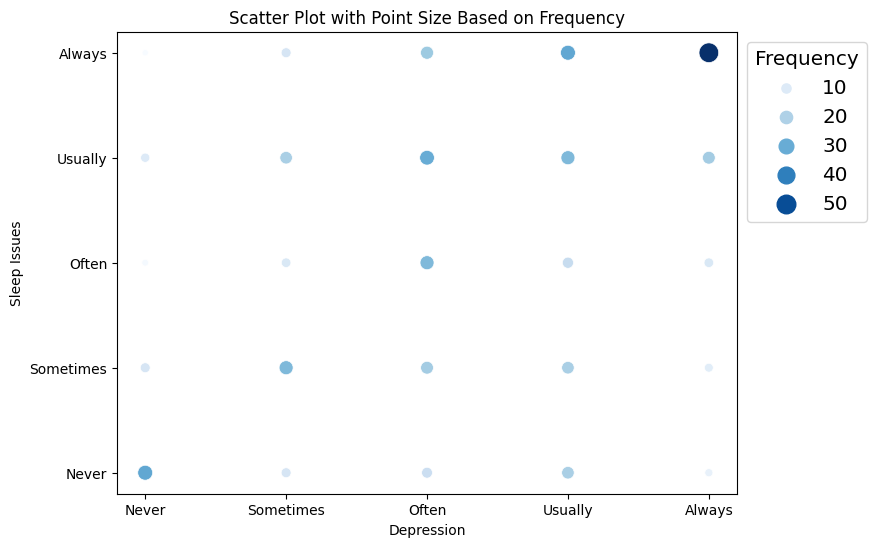

In [41]:
frequency = df.groupby(['depression', 'sleep_issues']).size().reset_index(name='counts')

color_palette = sns.color_palette("Blues", as_cmap=100)
labels = ['Never', 'Sometimes', 'Often', 'Usually', 'Always']

plt.figure(figsize=(8, 6))
depression_sleep = sns.scatterplot(x='depression', y='sleep_issues', hue='counts', palette=color_palette, size='counts', data=frequency, sizes=(20, 200))
num_divisions = 5
plt.gca().set_xticks(range(1, num_divisions + 1))
plt.gca().set_xticklabels(labels)
plt.gca().set_yticks(range(1, num_divisions + 1))
plt.gca().set_yticklabels(labels)
depression_sleep.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 'x-large', title = 'Frequency', title_fontsize = 'x-large')

plt.title('Scatter Plot with Point Size Based on Frequency')
plt.xlabel('Depression')
plt.ylabel('Sleep Issues')
plt.show()



En este gráfico se ve una relación clara entre las dos variables. Cuanto menores son los problemas de sueño, menor es el sentimiento de depresión (o viceversa, ya que no se puede afirmar que es una relación de causa-efecto).
No obstante, lo más impactante es que la combinación que más se repite es en la que los encuestados siempre tienen dificultades para dormir y siempre se sienten deprimidos o bajos de moral.

Vamos a hacer el mismo gráfico pero cambiando la variable 'depression' por el tiempo de uso medio de redes sociales para ver si tiene alguna relación con los problemas de sueño.

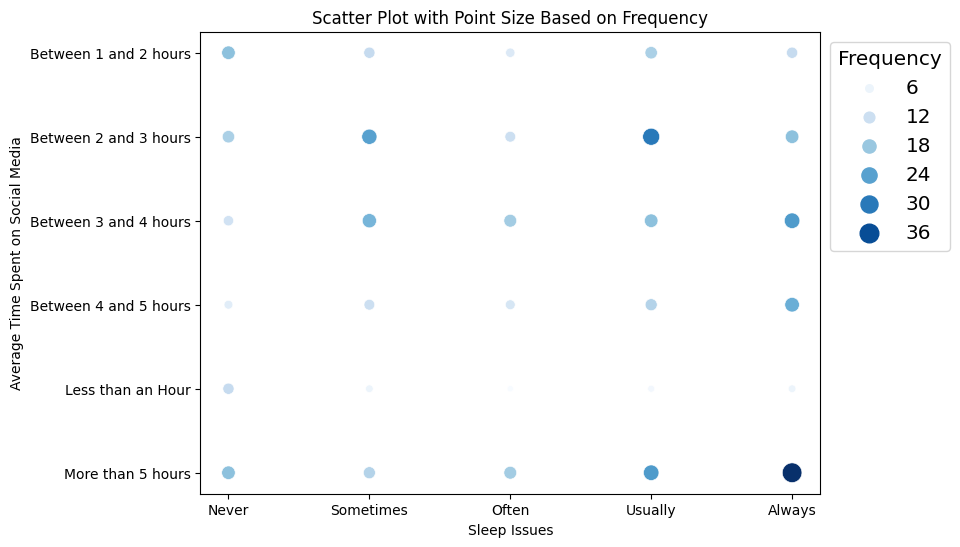

In [50]:
frequency = df.groupby(['average_time', 'sleep_issues']).size().reset_index(name='counts')

color_palette = sns.color_palette("Blues", as_cmap=100)
labels = ['Never', 'Sometimes', 'Often', 'Usually', 'Always']

plt.figure(figsize=(8, 6))
time_sleep = sns.scatterplot(y='average_time', x='sleep_issues', hue='counts', palette=color_palette, size='counts', data=frequency, sizes=(20, 200))
num_divisions = 5
plt.gca().set_xticks(range(1, num_divisions + 1))
plt.gca().set_xticklabels(labels)

time_sleep.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 'x-large', title = 'Frequency', title_fontsize = 'x-large')

plt.title('Scatter Plot with Point Size Based on Frequency')
plt.xlabel('Sleep Issues')
plt.ylabel('Average Time Spent on Social Media')
plt.show()

Y, efectivamente, vemos que muchos de los que pasan más de 5 horas al día en redes sociales tienen problemas de sueño a diario mientras quelos que pasan menos de una hora en redes prácticamente no tienen problemas de sueño.

Si hacemos otro gráfico cambiando los problemas de sueño por la variable 'depression' es probable que encontremos resultados similares:

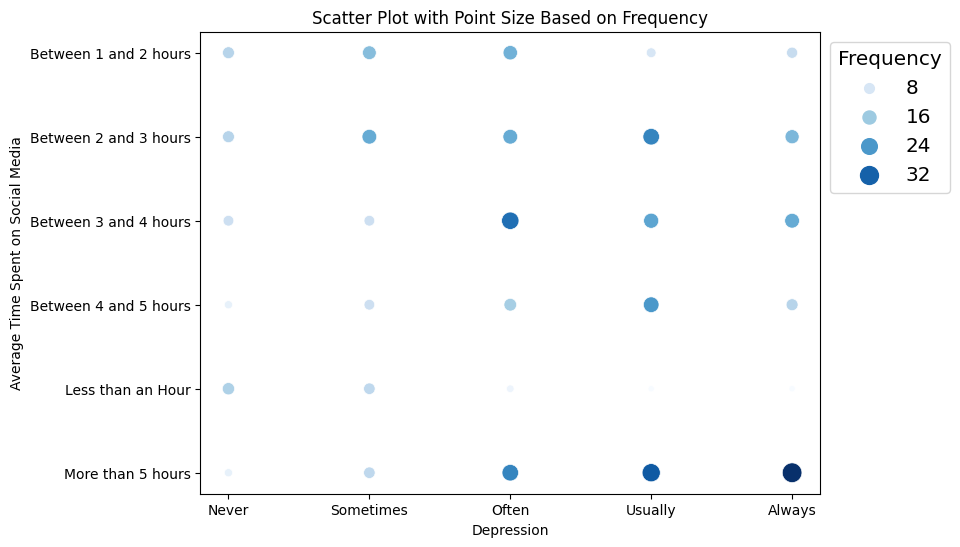

In [51]:
frequency = df.groupby(['depression', 'average_time']).size().reset_index(name='counts')

color_palette = sns.color_palette("Blues", as_cmap=100)
labels = ['Never', 'Sometimes', 'Often', 'Usually', 'Always']

plt.figure(figsize=(8, 6))
time_depression = sns.scatterplot(y='average_time', x='depression', hue='counts', palette=color_palette, size='counts', data=frequency, sizes=(20, 200))
num_divisions = 5
plt.gca().set_xticks(range(1, num_divisions + 1))
plt.gca().set_xticklabels(labels)

time_depression.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 'x-large', title = 'Frequency', title_fontsize = 'x-large')

plt.title('Scatter Plot with Point Size Based on Frequency')
plt.xlabel('Depression')
plt.ylabel('Average Time Spent on Social Media')
plt.show()

En este caso, el número de encuestados que se sienten deprimidos a menudo o siempre es bastante elevado según aumentan las horas de uso de las redes sociales.

Para finalizar, seleccionamos la variable que representa una creciente preocupación en la actualidad: el grado de comparación con gente exitosa/famosa en redes.


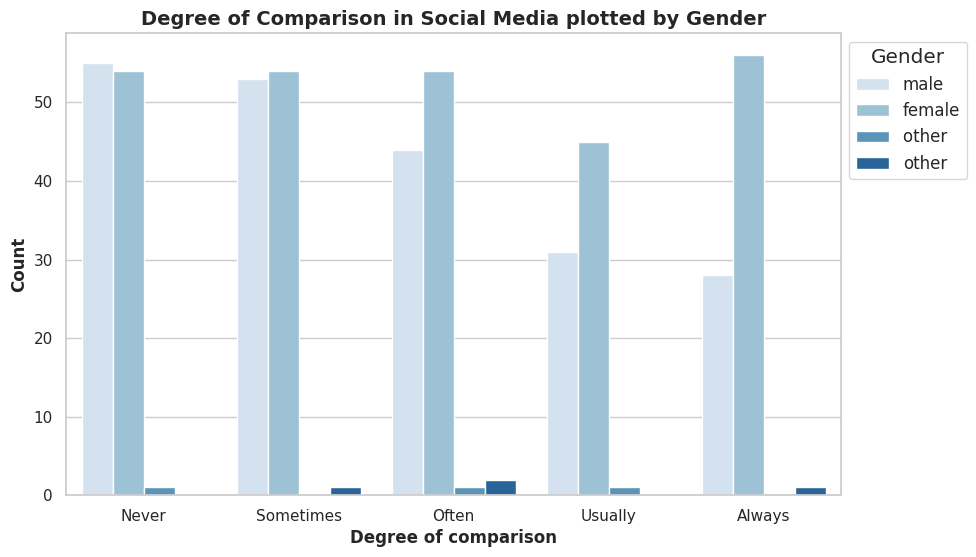

In [62]:
sns.set(style="whitegrid")
labels = ['Never', 'Sometimes', 'Often', 'Usually', 'Always']
plt.figure(figsize=(10, 6))

comparison_gender = sns.countplot(x='compare_success', hue='gender', palette = 'Blues', data=df)
comparison_gender.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 'medium', title = 'Gender', title_fontsize = 'large')
plt.gca().set_xticklabels(labels)

plt.xlabel('Degree of comparison', fontweight = 'bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Degree of Comparison in Social Media plotted by Gender', fontweight = 'bold', fontsize = 14)

plt.show()

El gráfico está dividido por género y se ve claramente que el número de hombres y mujeres que no se comparan nunca o lo hacen solo algunas veces está bastante equilibrado.
No obstante, a medida que aumenta el grado de comparación, se ve que el número de mujeres también aumenta, mientras que el número de hombres que se comparan excesivamente va disminuyendo.